# Comparing effect of MUC5B Mutation in Colon cancer on Transcriptomics and Proteomics

Investigate how transcript and proteomic levels are altered when MUC5B is mutated in Colon cancer for proteins who showed significant differences in Transcript expression

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import cptac
import cptac.algorithms as al

co = cptac.Colon()

### Specify Mutation Gene

In [2]:
mutation_gene = 'FSIP2'

### Read in Trans Results and filter for Colon cancer and MUC5B Mutation

In [3]:
#Read in Results of Trans Analysis
Trans_Results = pd.read_csv("../Formatted_Trans_Results.csv")

#Filter for only Colon cancer, and only MUC5B Mutation
Colon = Trans_Results.loc[Trans_Results['Cancer_Type'] == 'Colon']
gene_Colon = Colon.loc[Colon['Mutation_Gene'] == mutation_gene]

### Split proteomics and transcriptomics

In [4]:
gene_Colon_Prot = gene_Colon.loc[gene_Colon['Omics'] == 'proteomics']
gene_Colon_Trans = gene_Colon.loc[gene_Colon['Omics'] == 'transcriptomics']

### Display proteomics

In [5]:
print(len(gene_Colon_Prot))
gene_Colon_Prot

1


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
541,Colon,FSIP2,PRDX5,NaN,proteomics,False,0.000006


### Display transcriptomics

In [6]:
print(len(gene_Colon_Trans))
gene_Colon_Trans

33


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
543,Colon,FSIP2,METAP1D,NaN,transcriptomics,True,3.018148e-04
545,Colon,FSIP2,NR1I2,NaN,transcriptomics,False,1.003627e-08
546,Colon,FSIP2,CXCL14,NaN,transcriptomics,False,1.083763e-08
547,Colon,FSIP2,A1CF,NaN,transcriptomics,False,1.228545e-08
548,Colon,FSIP2,MOGAT3,NaN,transcriptomics,False,3.569568e-08
549,Colon,FSIP2,PLA2R1,NaN,transcriptomics,False,4.227186e-08
550,Colon,FSIP2,CYP2B6,NaN,transcriptomics,False,7.609309e-08
551,Colon,FSIP2,SLC39A5,NaN,transcriptomics,False,8.356187e-08
552,Colon,FSIP2,PRAP1,NaN,transcriptomics,False,9.341432e-08
553,Colon,FSIP2,TCF7,NaN,transcriptomics,False,1.597423e-07


<br><br>When FSIP2 is mutated in colon cancer, 33 transcripts are significantly altered, yet only 1 proteomics <br><br>

### Generate lists of proteins significantly altered in proteomic expression and transcript expression when FSIP2 mutated

In [7]:
prots_gene_Colon = list(gene_Colon_Prot['Protein'])
rna_gene_Colon = list(gene_Colon_Trans['Protein'])

### Make plot illustrating $Δ$ transcriptomics and  $Δ$ proteomics the above genes showing altered transcripts when FSIP2 is mutated

### Compute $Δ$ proteomics for above proteins

In [8]:
delta_proteomics = {}

#Loop through proteins found in both lists
for prot in rna_gene_Colon:
    #Use join omics to mutations to compare proteomic levels when mutation gene is mutated
    proteomic_df = co.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='proteomics',omics_genes=prot)
    
    #Use only Tumor samples
    proteomic_df = proteomic_df.loc[proteomic_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean proteomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_proteomics'])
    wt_mean = np.mean(wt_df[prot + '_proteomics'])
    
    #Compute Delta (mutated mean - wildtype mean) proteomic value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_proteomics[prot] = delta

METAP1D did not match any columns in proteomics dataframe. METAP1D_proteomics column inserted, but filled with NaN.
NR1I2 did not match any columns in proteomics dataframe. NR1I2_proteomics column inserted, but filled with NaN.
MOGAT3 did not match any columns in proteomics dataframe. MOGAT3_proteomics column inserted, but filled with NaN.
PLA2R1 did not match any columns in proteomics dataframe. PLA2R1_proteomics column inserted, but filled with NaN.
CYP2B6 did not match any columns in proteomics dataframe. CYP2B6_proteomics column inserted, but filled with NaN.
SLC39A5 did not match any columns in proteomics dataframe. SLC39A5_proteomics column inserted, but filled with NaN.
TCF7 did not match any columns in proteomics dataframe. TCF7_proteomics column inserted, but filled with NaN.
JADE1 did not match any columns in proteomics dataframe. JADE1_proteomics column inserted, but filled with NaN.
SLC3A1 did not match any columns in proteomics dataframe. SLC3A1_proteomics column inserted,

### Print $Δ$ proteomics

In [9]:
delta_proteomics

{'METAP1D': nan,
 'NR1I2': nan,
 'CXCL14': -0.42686785714285713,
 'A1CF': -0.44888815789473685,
 'MOGAT3': nan,
 'PLA2R1': nan,
 'CYP2B6': nan,
 'SLC39A5': nan,
 'PRAP1': 0.21999743589743584,
 'TCF7': nan,
 'SGK2': -0.4417820512820513,
 'JADE1': nan,
 'TYMS': 0.9397444444444445,
 'SLC3A1': nan,
 'LY6G6D': nan,
 'PLA2G4F': nan,
 'LINC01560': nan,
 'DUSP4': nan,
 'CTTNBP2': nan,
 'PPP1R14D': -0.33119527777777785,
 'NASP': 0.34285746753246743,
 'RUBCNL': nan,
 'ACE2': -0.5953502941176471,
 'RTTN': nan,
 'SSUH2': nan,
 'TNNC2': nan,
 'LINC00526': nan,
 'IYD': -0.4603526470588233,
 'MAPK12': nan,
 'ADNP2': nan,
 'RBFA': nan,
 'PHOSPHO2': nan,
 'TINAG': nan}

### Compute $Δ$ transcriptomics for above proteins

In [10]:
delta_transcriptomics = {}

#Loop through proteins found in both lists
for prot in rna_gene_Colon:
    #Use join omics to mutations to compare transcript levels when mutation gene is mutated
    transcript_df = co.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='transcriptomics',omics_genes=prot)
    
    #Use only Tumor samples
    transcript_df = transcript_df.loc[transcript_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean transcriptomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_transcriptomics'])
    wt_mean = np.mean(wt_df[prot + '_transcriptomics'])
    
    #Compute Delta (mutated mean - wildtype mean) transcriptomics value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_transcriptomics[prot] = delta

### Print $Δ$ transcriptomics

In [11]:
delta_transcriptomics

{'METAP1D': -0.38665952380952273,
 'NR1I2': -2.020522943722943,
 'CXCL14': -2.1032519480519483,
 'A1CF': -1.853553354978354,
 'MOGAT3': -1.8804727272727266,
 'PLA2R1': -1.149883766233767,
 'CYP2B6': -3.03496471861472,
 'SLC39A5': -2.029318290043289,
 'PRAP1': -3.1394294372294382,
 'TCF7': -1.125695454545454,
 'SGK2': -1.675624675324678,
 'JADE1': 0.481019913419912,
 'TYMS': 0.970732683982682,
 'SLC3A1': -2.162056060606064,
 'LY6G6D': -4.394509848484848,
 'PLA2G4F': -1.4247767316017335,
 'LINC01560': -0.6952382034632016,
 'DUSP4': 1.7446593073593064,
 'CTTNBP2': -1.9989086580086566,
 'PPP1R14D': -1.48373322510822,
 'NASP': 0.4656879870129895,
 'RUBCNL': -1.901150541125542,
 'ACE2': -2.363695021645019,
 'RTTN': 0.5837458874458887,
 'SSUH2': -1.7003747835497847,
 'TNNC2': -2.365084740259739,
 'LINC00526': -1.1946484848484857,
 'IYD': -1.4298047619047622,
 'MAPK12': 1.0697611471861483,
 'ADNP2': 0.4617721861471793,
 'RBFA': 0.5088139610389621,
 'PHOSPHO2': -0.6406575757575723,
 'TINAG': -1

## Illustrate $Δ$ proteomics and $Δ$ transcriptomics in a plot

### Format data in dataframe

In [12]:
#Make Pandas Dataframe
delta_proteomic_transcriptomic_df = pd.DataFrame(columns=['Protein','Delta_Proteomics','Delta_Transcriptomics'])

#Fill with values from delta proteomics and delta transcriptomics dictionaries
for key, val in delta_proteomics.items():
    delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.append({'Protein':key, 'Delta_Proteomics':val,'Delta_Transcriptomics':delta_transcriptomics[key]}, ignore_index = True)

In [13]:
delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.dropna(axis = 0)
delta_proteomic_transcriptomic_df

,Protein,Delta_Proteomics,Delta_Transcriptomics
2,CXCL14,-0.426868,-2.103252
3,A1CF,-0.448888,-1.853553
8,PRAP1,0.219997,-3.139429
10,SGK2,-0.441782,-1.675625
12,TYMS,0.939744,0.970733
19,PPP1R14D,-0.331195,-1.483733
20,NASP,0.342857,0.465688
22,ACE2,-0.595350,-2.363695
27,IYD,-0.460353,-1.429805


### Plot $Δ$ proteomics and $Δ$ transcriptomics in a scatter plot, along with line $ y = x $

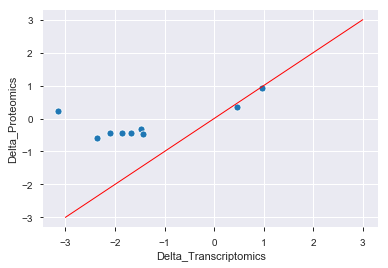

In [16]:
scatter_plot = sns.scatterplot(data=delta_proteomic_transcriptomic_df, x='Delta_Transcriptomics', y='Delta_Proteomics')
plt.plot([-3, 3], [-3, 3], linewidth=1, color='red')
